<a href="https://colab.research.google.com/github/isaiasgj0002/ejerciciosIA/blob/main/Algoritmos%20Python/AlgoritmoClasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
datos, metadatos = tfds.load('fashion_mnist',as_supervised=True, with_info=True)

In [4]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [5]:
datos_entrenamiento, datos_prueba = datos['train'],datos['test']

In [6]:
nombres_clases = metadatos.features['label'].names

In [7]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas
datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_prueba=datos_prueba.map(normalizar)
datos_entranamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

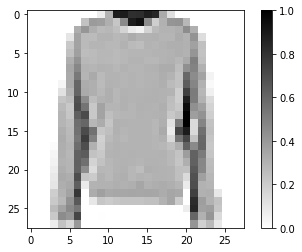

In [9]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

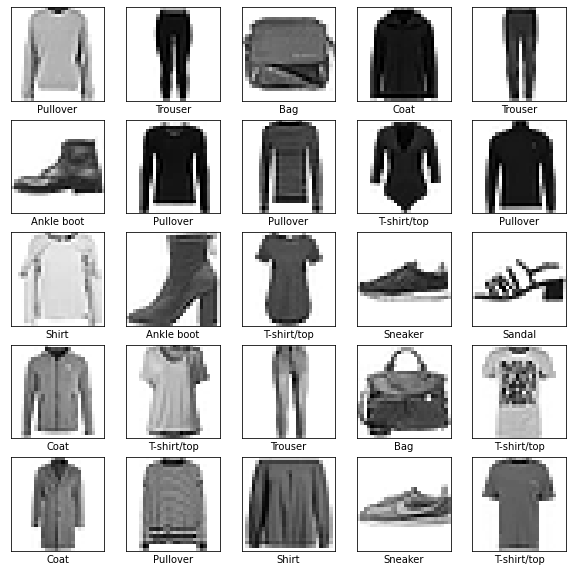

In [10]:
plt.figure(figsize=(10,10))
for i,(imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen,cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [11]:
from tensorflow.python.distribute import input_lib
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [12]:
from tensorflow.python.training.saver import metrics
modelo.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [13]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_prueba = metadatos.splits['test'].num_examples

In [14]:
print(num_ej_entrenamiento)
print(num_ej_prueba)

60000
10000


In [15]:
tamaño_lote=64
datos_entrenamiento= datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(tamaño_lote)
datos_prueba=datos_prueba.batch(tamaño_lote)

In [16]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/tamaño_lote))

Epoch 1/5
938/938 [==============================] - 13s 7ms/step - loss: 0.5603 - accuracy: 0.8033
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4014 - accuracy: 0.8575
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3507 - accuracy: 0.8746
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3324 - accuracy: 0.8808
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3151 - accuracy: 0.8852


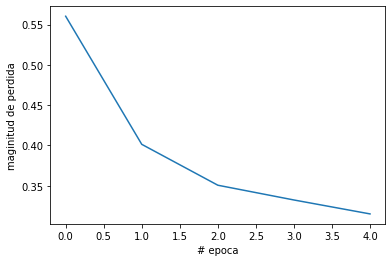

In [17]:
plt.xlabel("# epoca")
plt.ylabel("maginitud de perdida")
plt.plot(historial.history["loss"])

In [18]:
import numpy as np
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiquetas_prueba=etiquetas_prueba.numpy()
  predicciones=modelo.predict(imagenes_prueba)

2/2 [==============================] - 0s 7ms/step


In [19]:
imagen = imagenes_prueba[1]
imagen=np.array([imagen])
prediccion=modelo.predict(imagen)
print('Predicion: '+nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 89ms/step
Predicion: Coat
